# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [ ]:
import tensorflow as tf

## Get the dataset

In [ ]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [ ]:
# Pre processing
#X_train, X_test = X_train / 255.0, X_test / 255.0

## Visualize the dataset
Print some images with labels.

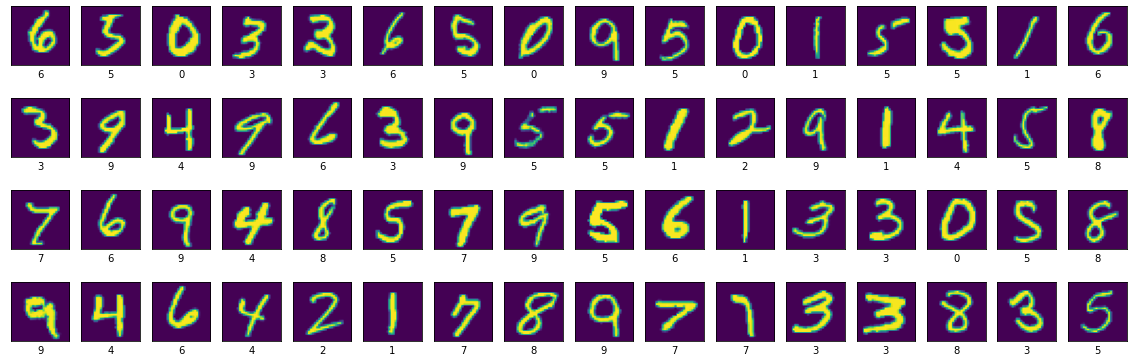

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i in range(64):
    plt.subplot(12,16,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(Y_train[i])
plt.show()
# Your code

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
(8000, 28, 28)
(2000, 28, 28)
(8000,)
(2000,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


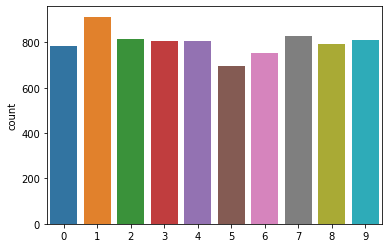

In [ ]:
import numpy as np
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
import seaborn as sns
sns.countplot(Y_train)
# Your code

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


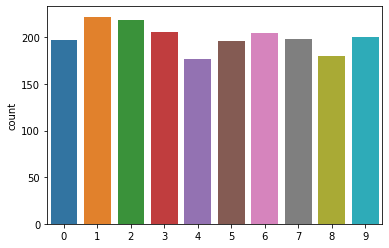

In [ ]:
sns.countplot(Y_test)

## Model

In [ ]:
# model building
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 512)               7930368   
                                                        

In [ ]:
# Compile the model (add optimizers and metrics)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Fit the model on the training data (specify validation_split, read about validation if new to you)
history = model.fit(X_train, Y_train, epochs=10,
                    validation_data=(X_test, Y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


250/250 [==============================] - 15s 9ms/step - loss: 1.7390 - accuracy: 0.8806 - val_loss: 0.1105 - val_accuracy: 0.9625
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0978 - accuracy: 0.9680 - val_loss: 0.0832 - val_accuracy: 0.9710
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0584 - accuracy: 0.9820 - val_loss: 0.0588 - val_accuracy: 0.9790
Epoch 4/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.0679 - val_accuracy: 0.9810
Epoch 5/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0308 - accuracy: 0.9894 - val_loss: 0.0727 - val_accuracy: 0.9805
Epoch 6/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0337 - accuracy: 0.9887 - val_loss: 0.0953 - val_accuracy: 0.9730
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0322 - accuracy: 0.9904 - val_loss: 0.1027 - val_accuracy: 0.9735
Epoch 8/10
250/2

In [ ]:
model.predict(X_test[:10])

array([[4.6909232e-19, 7.8360089e-14, 2.4551853e-20, 1.1387561e-22,
        1.0000000e+00, 2.1116997e-16, 8.6422997e-13, 3.2395407e-20,
        1.7915640e-13, 1.3935806e-12],
       [4.4259128e-11, 2.6344864e-09, 2.5381989e-13, 2.1446405e-11,
        8.1813820e-13, 1.6630335e-09, 1.0000000e+00, 8.0340614e-16,
        1.1749875e-10, 5.2394239e-12],
       [7.3123209e-12, 2.6158100e-09, 1.0000000e+00, 2.3840376e-11,
        1.2437272e-08, 1.9627647e-16, 5.4411753e-10, 2.2764390e-12,
        2.6558590e-12, 3.2826552e-14],
       [4.0295269e-09, 9.9999964e-01, 1.2882980e-08, 1.1836447e-10,
        5.8151961e-08, 2.4598221e-11, 1.9295245e-08, 3.3362588e-07,
        5.3990701e-09, 1.7628841e-08],
       [1.9770201e-10, 5.7792860e-13, 5.0379545e-10, 2.0853852e-08,
        2.2886215e-13, 8.5465291e-07, 6.1116058e-05, 3.1439853e-12,
        9.9993801e-01, 5.5297450e-10],
       [9.9999988e-01, 3.0052119e-10, 6.4699108e-08, 2.0906490e-11,
        3.6234508e-13, 2.4545642e-11, 1.2258585e-08, 3.07

In [ ]:
arr=model.predict(X_test[:64])
min=0.0
ar=[]
for i in range(0,64):
  min=arr[i,0]

  for j in range(0,10):
    if(arr[i,j]>min):
      min=arr[i,j]

  for j in range(0,10):
    if(arr[i,j]==min):
      ar.append(j)

In [ ]:
xx=model.evaluate(X_test,Y_test)
print(xx)

63/63 [==============================] - 0s 4ms/step - loss: 0.0709 - accuracy: 0.9810
[0.07088601589202881, 0.9810000061988831]


## Predict some images
Print the image along with its label (true value) and predicted value.

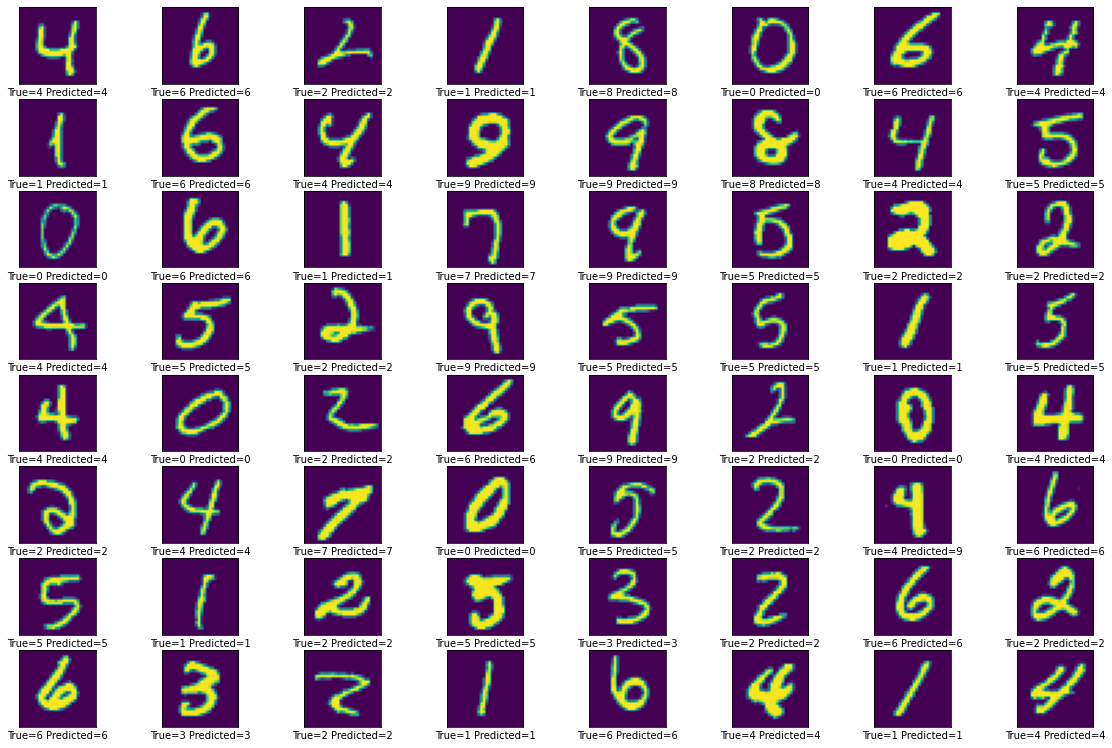

In [ ]:
# Your code
plt.figure(figsize=(20,20))
for i in range(64):
    plt.subplot(12,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(f"True={Y_test[i]} Predicted={ar[i]}")
plt.show()